<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 500000),
                     "zt2" : normal(0, 1, 500000),
                     "zt3" : normal(0, 1, 500000)})
data

,zt1,zt2,zt3
0,-0.006201,-1.731357,0.415309
1,-0.869188,0.017302,0.466980
2,0.685498,1.081014,0.590913
3,0.714203,-0.208344,1.138432
4,-0.214038,-0.593703,-0.413858
...,...,...,...
499995,0.150629,1.246646,1.799683
499996,-0.041360,0.772699,-0.083778
499997,0.465034,1.296694,-0.307290
499998,-0.144146,-0.654690,-0.063954


In [3]:
n=50
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
  

    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

x = table_data_all[['Xt1', 'Xt2', 'Xt3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({'Xt1'   : table_data_all['Xt1'],
                               'Xt2'   : table_data_all['Xt2'],
                               'Xt3'   : table_data_all['Xt3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

Xt1       Xt2       Xt3  ...          Y      y_hat     e_hat
rep  index                                ...                                
0.0  0.0    0.815637  1.039319  0.085882  ...   6.025665   6.247255 -0.221589
     1.0    0.355325  1.092356  0.860220  ...   8.853728   8.878031 -0.024304
     2.0    0.949112 -0.102686  1.827389  ...  10.804266  10.479490  0.324775
     3.0    0.649836 -0.863079  1.849388  ...   8.023013   9.152857 -1.129844
     4.0    0.503001  0.404271 -1.685773  ...  -1.302868  -1.170468 -0.132400
...              ...       ...       ...  ...        ...        ...       ...
99.0 45.0  -0.695179 -0.174720  0.011643  ...   3.501286   3.345494  0.155792
     46.0   1.013018  0.863244 -0.107348  ...   4.452184   5.346842 -0.894658
     47.0   1.021710 -0.954274  1.585185  ...   8.406183   8.214519  0.191664
     48.0  -0.038465 -2.175333 -1.157442  ...  -0.029864  -3.894586  3.864723
     49.0   0.109986 -0.094207 -1.043458  ...   0.146118   0.088496  0.057622

[5000 rows x 7 columns]

In [ ]:
table_data_new.to_csv('sampling_100rep_n50_2020.csv')
files.download('sampling_100rep_n50_2020.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
table_data_new.mean()

Xt1     -1.416429e-02
Xt2      1.704068e-02
Xt3      1.706718e-02
e       -1.284834e-01
Y        3.952854e+00
y_hat    3.952854e+00
e_hat   -5.489392e-15
dtype: float64

In [5]:
table_data_new.var()

Xt1        1.017183
Xt2        1.011216
Xt3        0.995449
e         89.241596
Y        104.721644
y_hat     15.525394
e_hat     89.196250
dtype: float64

In [6]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_new.corr()

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
Xt1,1.000000e+00,1.663332e-02,-1.005208e-02,-0.000963,0.037457,9.728117e-02,1.807688e-16
Xt2,1.663332e-02,1.000000e+00,1.699557e-02,0.020468,0.172914,4.490845e-01,-1.963004e-16
Xt3,-1.005208e-02,1.699557e-02,1.000000e+00,-0.008992,0.344798,8.954909e-01,-1.569362e-16
e,-9.629174e-04,2.046752e-02,-8.991631e-03,1.000000,0.922958,7.584759e-04,9.997459e-01
Y,3.745691e-02,1.729144e-01,3.447976e-01,0.922958,1.000000,3.850376e-01,9.229009e-01
y_hat,9.728117e-02,4.490845e-01,8.954909e-01,0.000758,0.385038,1.000000e+00,-2.017120e-16
e_hat,1.807688e-16,-1.963004e-16,-1.569362e-16,0.999746,0.922901,-2.017120e-16,1.000000e+00


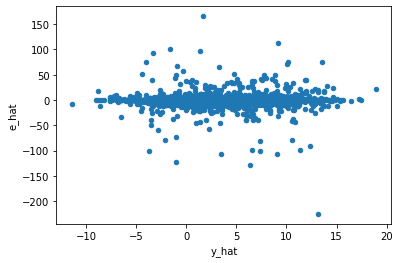

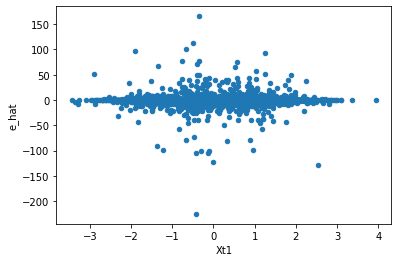

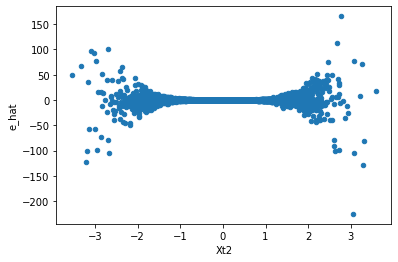

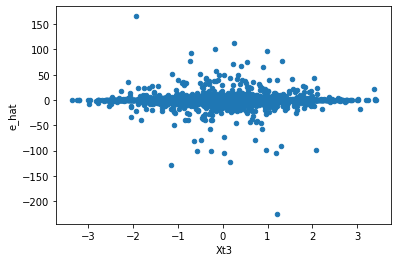

In [7]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt3', y='e_hat', kind = 'scatter')